In [1]:
import pandas as pd

df = pd.read_csv("dataNoWeather.csv", index_col=0)

df.index = pd.to_datetime(df.index)
df.head()

,Energia,Dlug. dnia,Typ dnia,Pora roku
Data czas,,,,
2015-09-01 00:00:00,122.772,13.75,1,3
2015-09-01 01:00:00,38.860,13.75,1,3
2015-09-01 02:00:00,39.401,13.75,1,3
2015-09-01 03:00:00,76.393,13.75,1,3
2015-09-01 04:00:00,317.443,13.75,1,3


In [2]:
y = df["Energia"].resample('W').mean()

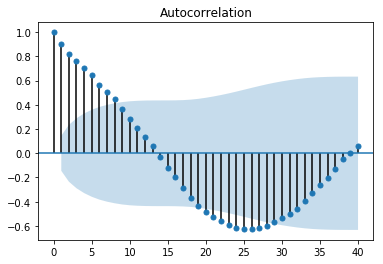

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y, lags=40)

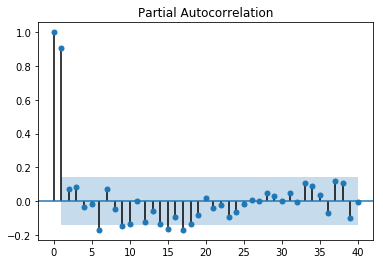

In [12]:
sm.graphics.tsa.plot_pacf(y, lags=40)

In [5]:
y_tr = y[:'2018-06-03']

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6913      0.088      7.822      0.000       0.518       0.865
ar.S.L52      -0.3335      0.221     -1.508      0.132      -0.767       0.100
sigma2      8.364e+05   1.19e+05      7.023      0.000    6.03e+05    1.07e+06


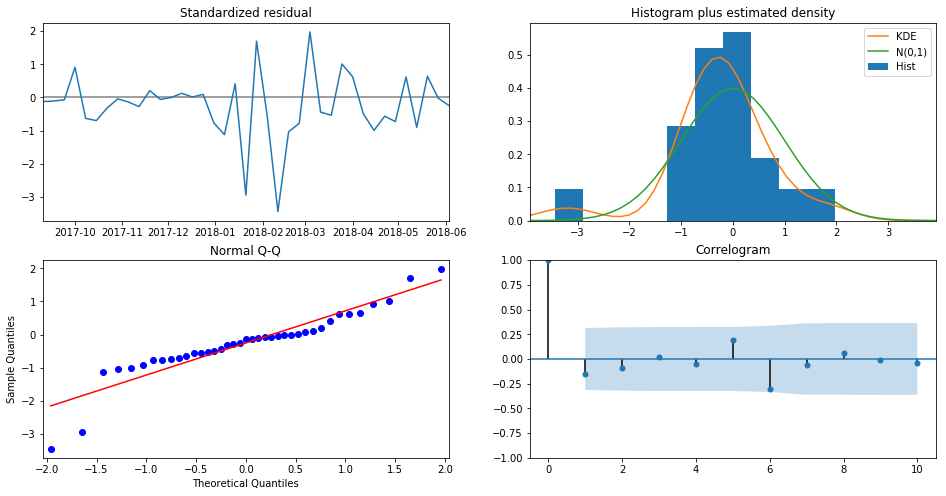

<Figure size 432x288 with 0 Axes>

In [13]:
model = sm.tsa.statespace.SARIMAX(y_tr,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)


results = model.fit()

print(model)
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

DatetimeIndex(['2018-06-03', '2018-06-10', '2018-06-17', '2018-06-24',
               '2018-07-01', '2018-07-08', '2018-07-15', '2018-07-22',
               '2018-07-29', '2018-08-05', '2018-08-12', '2018-08-19',
               '2018-08-26', '2018-09-02', '2018-09-09', '2018-09-16',
               '2018-09-23', '2018-09-30', '2018-10-07', '2018-10-14',
               '2018-10-21', '2018-10-28', '2018-11-04', '2018-11-11',
               '2018-11-18', '2018-11-25', '2018-12-02', '2018-12-09',
               '2018-12-16', '2018-12-23', '2018-12-30', '2019-01-06',
               '2019-01-13', '2019-01-20', '2019-01-27', '2019-02-03',
               '2019-02-10', '2019-02-17', '2019-02-24', '2019-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')


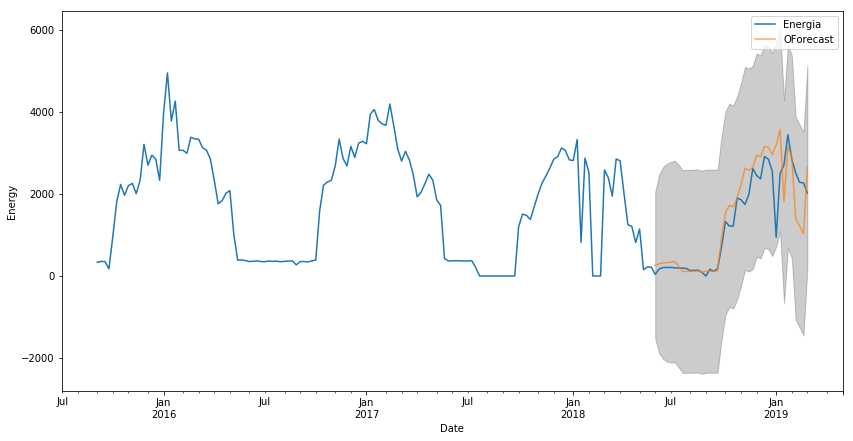

<Figure size 432x288 with 0 Axes>

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-03'), end=pd.to_datetime('2019-03-03'), dynamic=True)
pred_ci = pred.conf_int()


ax = y.plot(label='Energia')
pred.predicted_mean.plot(ax=ax, label='OForecast', alpha=.7, figsize=(14, 7))

print(pred_ci.index)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], 
                color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.show()


In [8]:
import numpy as np

y_forecasted = pred.predicted_mean
y_truth = y['2018-06-03':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('Energy varies from 0 to {}'.format(y.max()))

The Mean Squared Error of our forecasts is 358079.91
The Root Mean Squared Error of our forecasts is 598.4
Energy varies from 0 to 4960.033779761905


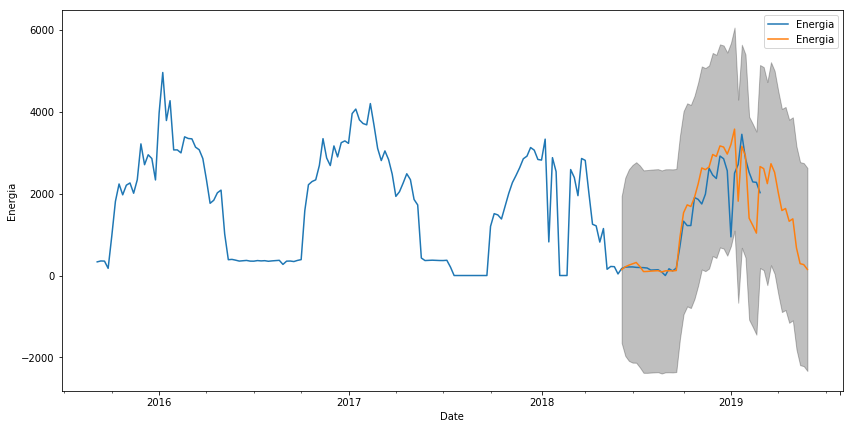

In [9]:
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Energia', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Energia')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energia')

plt.legend()
plt.show()